<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [25]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-13 11:31:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  63.4MB/s    in 2.4s    

2025-08-13 11:31:34 (63.4 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [26]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [69]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [70]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [71]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [31]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [33]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [34]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [35]:
table_name = 'main'

QUERY = f"""
SELECT sql FROM sqlite_master 
WHERE name= '{table_name}'
"""

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


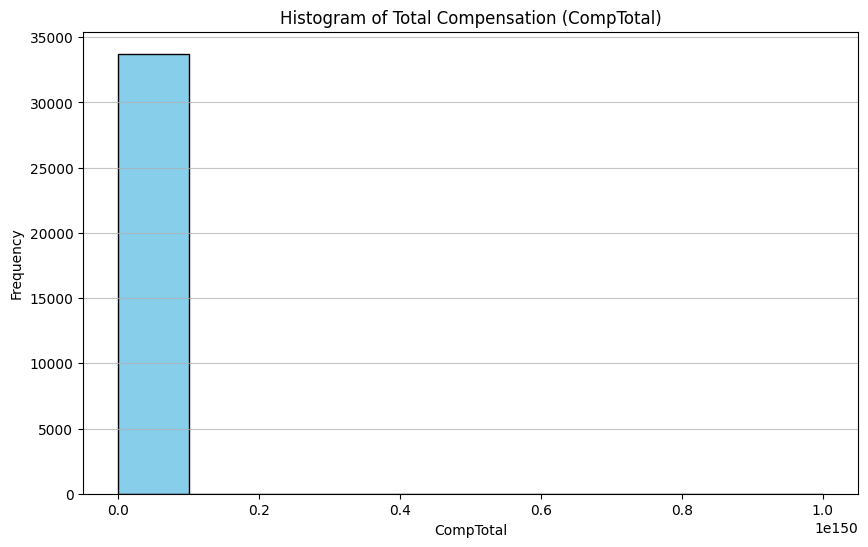

ProgrammingError: Cannot operate on a closed database.

In [14]:
## Write your code here

# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
conn = sqlite3.connect('survey-data.sqlite')
cursor = conn.cursor()

# Load data into DataFrame
df = pd.read_sql_query("select CompTotal from main;", conn)

plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close the connections
conn.close()
cursor.close()

**Box Plots**

Plot a box plot of Age.


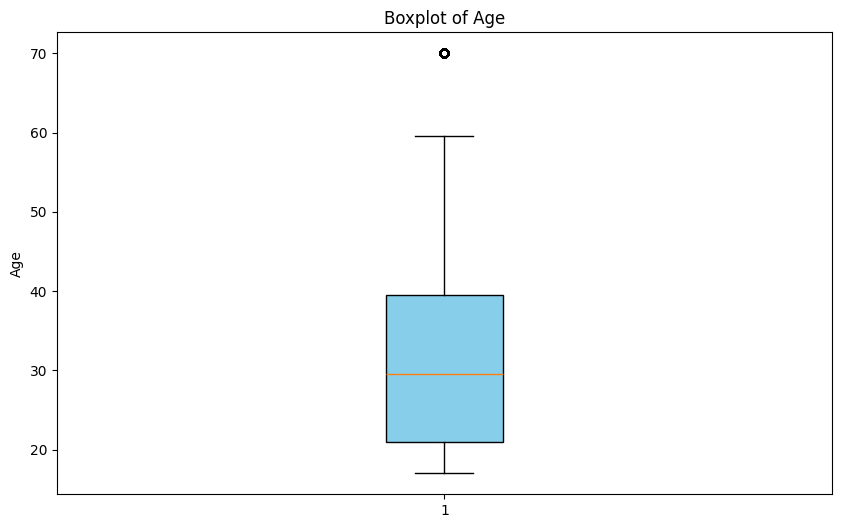

ProgrammingError: Cannot operate on a closed database.

In [23]:
## Write your code here
%matplotlib inline
# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
conn = sqlite3.connect('survey-data.sqlite')
#cursor = conn.cursor()

query = """select Age from main;"""
df = pd.read_sql_query(query, conn)

# Mapping age categories to numbers
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop missing values
df_numeric = df['Age_numeric'].dropna()

# Plot boxplot
plt.figure(figsize=(10,6))
plt.boxplot(df_numeric, vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

# Close the connections
conn.close()
cursor.close()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


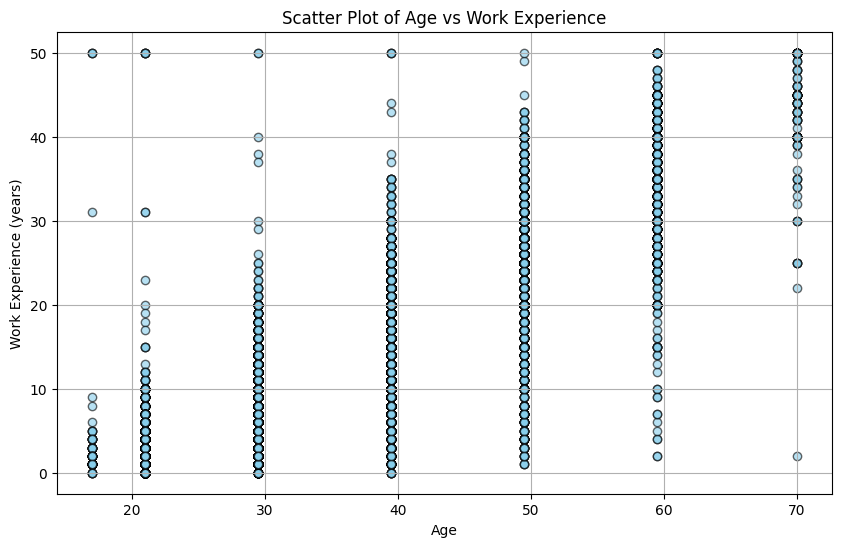

ProgrammingError: Cannot operate on a closed database.

In [49]:
## Write your code here

# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
conn = sqlite3.connect('survey-data.sqlite')
# cursor = conn.cursor()
query ="""SELECT Age, WorkExp FROM main;"""
df = pd.read_sql_query(query, conn)

# Mapping age categories to numbers
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Convert WorkExp to numeric
df['WorkExp_numeric'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['Age_numeric', 'WorkExp_numeric'])

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Age_numeric'], df_clean['WorkExp_numeric'], alpha=0.6, color='skyblue', edgecolors='black')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (years)')
plt.grid(True)
plt.show()

# Close the connections
conn.close()
cursor.close()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


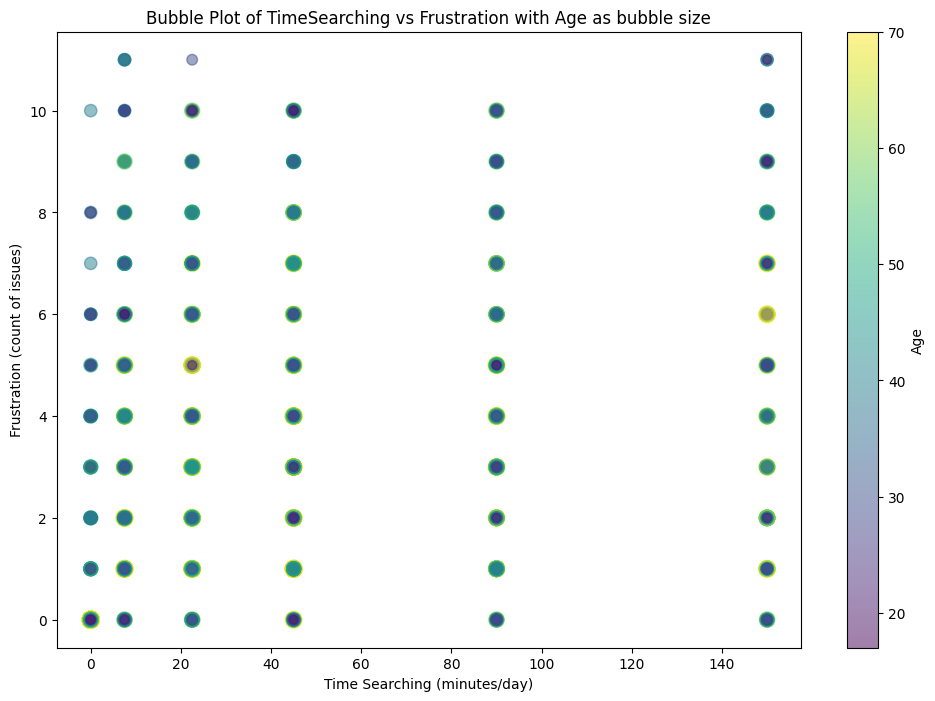

ProgrammingError: Cannot operate on a closed database.

In [64]:
## Write your code here
# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
conn = sqlite3.connect('survey-data.sqlite')
# cursor = conn.cursor()

# Read Age, TimeSearching, Frustration
query = "SELECT Age, TimeSearching, Frustration FROM main;"
df = pd.read_sql_query(query, conn)

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Map TimeSearching to numeric (minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
    None: 0
}
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_mapping)

# Map Frustration to numeric (count of items in the list)
df['Frustration_numeric'] = df['Frustration'].fillna('').apply(lambda x: len(x.split(';')) if x != '' else 0)

# Drop rows with missing Age
df_clean = df.dropna(subset=['Age_numeric', 'TimeSearching_numeric', 'Frustration_numeric'])

# Plot bubble chart
plt.figure(figsize=(12,8))
plt.scatter(
    df_clean['TimeSearching_numeric'],
    df_clean['Frustration_numeric'],
    s=df_clean['Age_numeric']*2,  # bubble size proportional to Age
    alpha=0.5,
    c=df_clean['Age_numeric'],    # color by Age
    cmap='viridis'
)
plt.xlabel('Time Searching (minutes/day)')
plt.ylabel('Frustration (count of issues)')
plt.title('Bubble Plot of TimeSearching vs Frustration with Age as bubble size')
plt.colorbar(label='Age')
plt.show()

# Close the connections
conn.close()
cursor.close()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


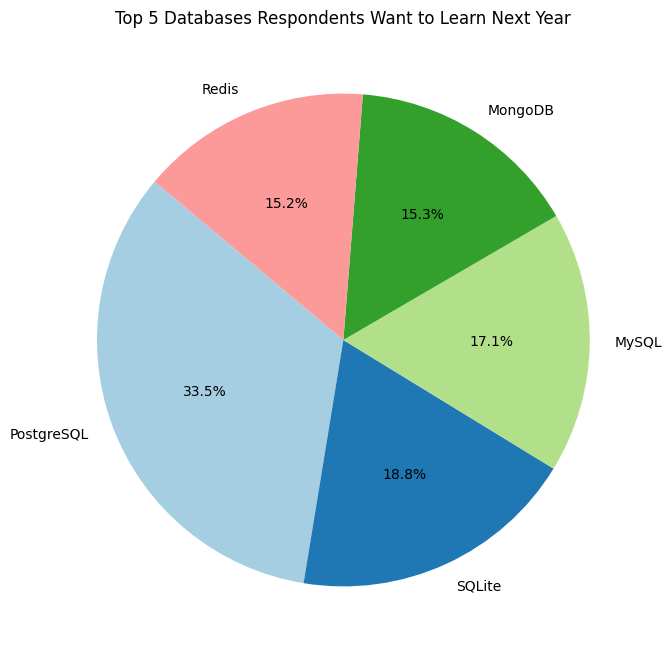

ProgrammingError: Cannot operate on a closed database.

In [66]:
## Write your code here

# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
conn = sqlite3.connect('survey-data.sqlite')
# cursor = conn.cursor()

# Read the column DatabaseWantToWorkWith
query = "SELECT DatabaseWantToWorkWith FROM main;"
df = pd.read_sql_query(query, conn)

# Drop NaN values
df = df.dropna(subset=['DatabaseWantToWorkWith'])

# Split the strings by ';' and explode into separate rows
df_exploded = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(drop=True)
df_exploded.name = 'Database'

# Count occurrences
db_counts = df_exploded.value_counts()

# Take top 5
top5_dbs = db_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top5_dbs, labels=top5_dbs.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()

# Close the connections
conn.close()
cursor.close()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


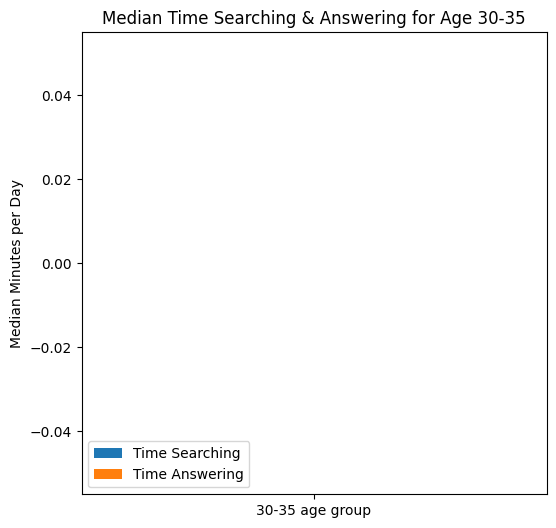

In [76]:
## Write your code here

# Create a connection to the SQLite database named 'survey-data.sqlite'
# If the database file does not exist, it will be created automatically
# Connect to database
conn = sqlite3.connect('survey-data.sqlite')

# Extract relevant columns
df = pd.read_sql_query("SELECT Age, TimeSearching, TimeAnswering FROM main;", conn)

# Map Age to numeric ranges
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Map TimeSearching/TimeAnswering to minutes
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearching_numeric'] = df['TimeSearching'].map(time_map)
df['TimeAnswering_numeric'] = df['TimeAnswering'].map(time_map)

# Filter age group 30-35
df_age = df[(df['Age_numeric'] >= 30) & (df['Age_numeric'] <= 35)]

# Calculate median values
median_searching = df_age['TimeSearching_numeric'].median()
median_answering = df_age['TimeAnswering_numeric'].median()

# Plot stacked bar chart
plt.figure(figsize=(6,6))
plt.bar('30-35 age group', median_searching, label='Time Searching')
plt.bar('30-35 age group', median_answering, bottom=median_searching, label='Time Answering')
plt.ylabel('Median Minutes per Day')
plt.title('Median Time Searching & Answering for Age 30-35')
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


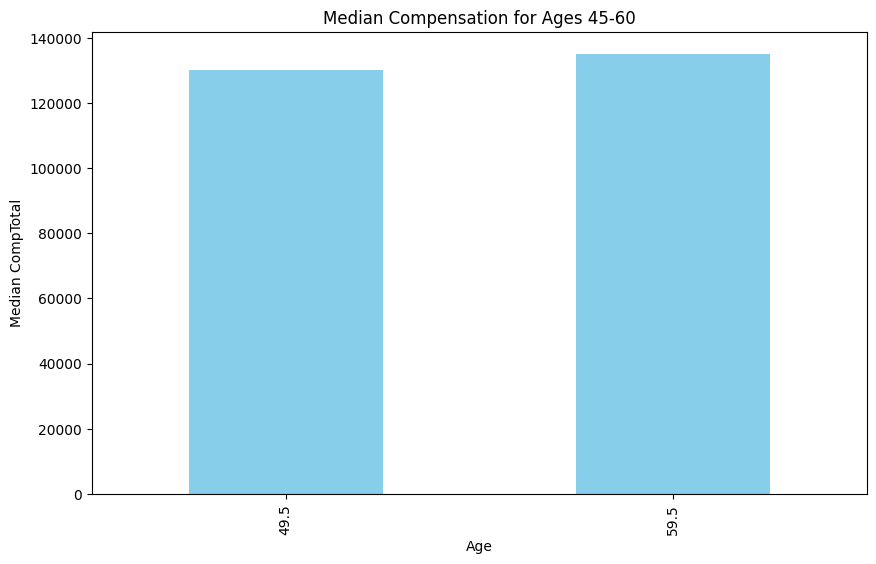

In [77]:
## Write your code here
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load Age and CompTotal
df = pd.read_sql_query("SELECT Age, CompTotal FROM main;", conn)

# Map Age categories to approximate numeric ages
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_mapping)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Filter ages from 45 to 60
df_filtered = df[(df['Age_numeric'] >= 45) & (df['Age_numeric'] <= 60)]

# Group by Age_numeric and calculate median CompTotal
median_comp = df_filtered.groupby('Age_numeric')['CompTotal'].median()

# Plot
plt.figure(figsize=(10,6))
median_comp.plot(kind='bar', color='skyblue')
plt.title('Median Compensation for Ages 45-60')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


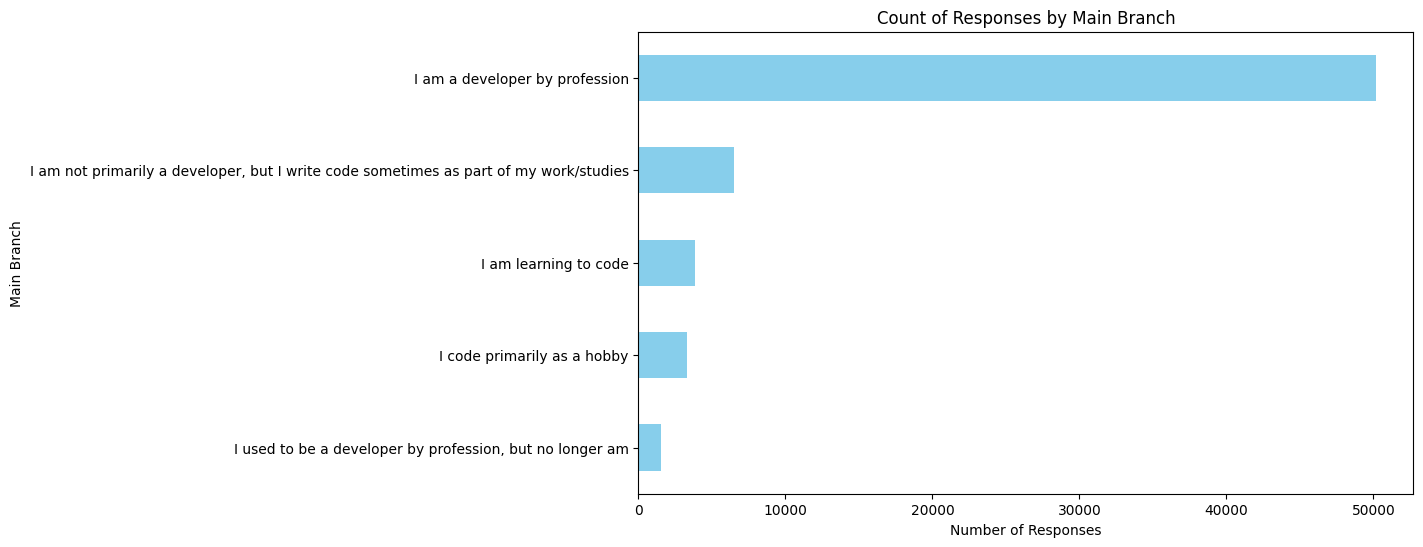

In [78]:
## Write your code here
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load MainBranch column
df = pd.read_sql_query("SELECT MainBranch FROM main;", conn)

# Count occurrences of each branch
branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue')
plt.title('Count of Responses by Main Branch')
plt.xlabel('Number of Responses')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # optional: largest on top
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [81]:
conn.close()
print("Connection closed. All code bases written by me! Diyor)))")

Connection closed. All code bases written by me! Diyor)))


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
